In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [2]:
df = pd.read_csv("..//Titanic/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [4]:
df[['Age']] = df[['Age']].astype(float, skipna = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [5]:
(df.isnull().sum() / df.shape[0])*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

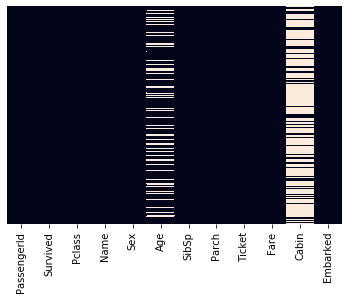

In [6]:
sns.heatmap(df.isnull(), cbar=False, yticklabels=False)

In [7]:
# deleting cabin
df.drop(["Cabin", "Name", "Ticket"] , axis = 1, inplace = True)

# Filling NaN
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace = True)
df["Age"].fillna(df["Age"].mean(skipna=True), inplace = True)

In [8]:
(df.isnull().sum() / df.shape[0])*100

PassengerId    0.0
Survived       0.0
Pclass         0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Fare           0.0
Embarked       0.0
dtype: float64

In [9]:
# reading test data
df_test = pd.read_csv("..//Titanic//test.csv")
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 27.8+ KB


In [10]:
# fixing the null values of the test data
(df_test.isnull().sum() / df_test.shape[0])*100

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

In [11]:
# deleting cabin
df_test.drop(["Cabin", "Name", "Ticket"] , axis = 1, inplace = True)

# Filling NaN
df_test["Fare"].fillna(df_test["Fare"].mean(skipna=True), inplace = True)
df_test["Age"].fillna(df_test["Age"].mean(skipna=True), inplace = True)

In [12]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [13]:
sns.pairplot(df["Survived"], df["Pclass"])

TypeError: 'data' must be pandas DataFrame object, not: <class 'pandas.core.series.Series'>

### Random Forest

In [12]:
from sklearn.preprocessing import LabelEncoder
df_categorical = df[["Sex", "Embarked"]]

le = LabelEncoder()
tmp = list(df_categorical["Sex"].unique())
tmp.extend(list(df_test["Sex"].unique()))
tmp = list(set(tmp))
le.fit(tmp)
df_categorical["Sex"] = le.transform(df_categorical["Sex"])
df_test["Sex"] = le.transform(df_test["Sex"])



tmp = list(df_categorical["Embarked"].unique())
tmp.extend(list(df_test["Embarked"].unique()))
tmp = list(set(tmp))
le.fit(tmp)
df_categorical["Embarked"] = le.transform(df_categorical["Embarked"])
df_test["Embarked"] = le.transform(df_test["Embarked"])



# df_categorical = df_categorical.apply(le.fit_transform)
df_categorical.head()

<ipython-input-12-85a9b793e2bf>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorical["Sex"] = le.transform(df_categorical["Sex"])
<ipython-input-12-85a9b793e2bf>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorical["Embarked"] = le.transform(df_categorical["Embarked"])


,Sex,Embarked
0,1,2
1,0,0
2,0,2
3,0,2
4,1,2


In [13]:
df.drop(df_categorical.columns, axis=1, inplace=True)
df = pd.concat([df, df_categorical], axis=1)

# Test label encoder
# df_categorical = df_test.select_dtypes(include=['object'])
# df_categorical = df_categorical.apply(le.transform)
# df_test.drop(df_categorical.columns, axis=1, inplace=True)
# df_test = pd.concat([df_test, df_categorical], axis=1)


df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked
0,1,0,3,22.0,1,0,7.2500,1,2
1,2,1,1,38.0,1,0,71.2833,0,0
2,3,1,3,26.0,0,0,7.9250,0,2
3,4,1,1,35.0,1,0,53.1000,0,2
4,5,0,3,35.0,0,0,8.0500,1,2


In [14]:
# from sklearn.ensemble import RandomForestClassifier
x_train = df.drop(["PassengerId", "Survived"], axis=1)
y_train = df["Survived"]
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

rf.score(x_train, y_train)

0.9820426487093153

In [15]:
error = abs(y_train - rf.predict(x_train))
print(100 - (sum(error) / sum(y_train))*100)

95.32163742690058


### Testing on Test Data

In [16]:
x_test = df_test.drop(["PassengerId"], axis=1)
y_test_pred = rf.predict(x_test)

# Write columns id, predictions into the output file
d = pd.DataFrame({'PassengerId': df_test["PassengerId"], 'Survived': y_test_pred})

# Write the output
d.to_csv("..//Titanic//submission_file.csv", sep=",")

# Logistic Regression 

In [17]:
df_train = pd.read_csv("..//Titanic/train.csv")
df_test  = pd.read_csv("..//Titanic/test.csv")

df_train[['Age']] = df_train[['Age']].astype(float, skipna = True)

# deleting cabin
df_train.drop(["Cabin", "Name", "Ticket"] , axis = 1, inplace = True)

# Filling NaN
df_train["Embarked"].fillna(df_train["Embarked"].mode()[0], inplace = True)
df_train["Age"].fillna(df_train["Age"].mean(skipna=True), inplace = True)

# deleting cabin
df_test.drop(["Cabin", "Name", "Ticket"] , axis = 1, inplace = True)

# Filling NaN
df_test["Fare"].fillna(df_test["Fare"].mean(skipna=True), inplace = True)
df_test["Age"].fillna(df_test["Age"].mean(skipna=True), inplace = True)

In [18]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [19]:
d = pd.get_dummies(df_train["Pclass"], prefix = "Pclass")
df_train = pd.concat([df_train, d], axis=1)
d = pd.get_dummies(df_train["Sex"], prefix = "Sex")
df_train = pd.concat([df_train, d], axis=1)
d = pd.get_dummies(df_train["Embarked"], prefix = "Embarked")
df_train = pd.concat([df_train, d], axis=1)

df_train.drop(["Pclass", "Sex", "Embarked"], axis=1, inplace=True)

# Test Data
d = pd.get_dummies(df_test["Pclass"], prefix = "Pclass")
df_test = pd.concat([df_test, d], axis=1)
d = pd.get_dummies(df_test["Sex"], prefix = "Sex")
df_test = pd.concat([df_test, d], axis=1)
d = pd.get_dummies(df_test["Embarked"], prefix = "Embarked")
df_test = pd.concat([df_test, d], axis=1)

df_test.drop(["Pclass", "Sex", "Embarked"], axis=1, inplace=True)


df_train.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,2,1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,3,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,4,1,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,5,0,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


In [20]:
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

scaler = StandardScaler()
df_train[["Age", "SibSp", "Parch", "Fare"]] = scaler.fit_transform(df_train[["Age", "SibSp", "Parch", "Fare"]])
df_test[["Age", "SibSp", "Parch", "Fare"]] = scaler.transform(df_test[["Age", "SibSp", "Parch", "Fare"]])

X_train = df_train.drop(["PassengerId", "Survived"], axis=1)
y_train = df_train["Survived"]

# logistic regression model
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe.fit(X_train, y_train)
col = X_train.columns[rfe.support_]
logm = sm.GLM(y_train, sm.add_constant(X_train[col]), family=sm.families.Binomial())
logm.fit().summary()

c:\users\subhajit.e.roy\appdata\local\programs\python\python38-32\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      881
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -392.19
Date:                Sat, 18 Apr 2020   Deviance:                       784.38
Time:                        18:30:00   Pearson chi2:                     901.
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1218      0.063      1.937      0.053      -0.001       0.245
Age           -0.5031      0.099     -5.067      0.000      -0.698      -0.309
SibSp         -0.3493      0.124     -2.821      0.005      -0.592      -0.107
Parch         -0.0746      0.095     -0.785      0.433      -0.261       0.112
Fare           0.1016      0.138      0.738      0.460      -0.168       0.371
Pclass_1       1.0740      0.189      5.687      0.000       0.704       1.444
Pclass_2       0.1342      0.154      0.872      0.383      -0.167       0.436
Pclass_3      -1.0863      0.143     -7.599      0.000      -1.366      -0.806
Sex_female     1.4114      0.107     13.201      0.000       1.202       1.621
Sex_male      -1.2896      0.102    -12.628      0.000      -1.490      -1.089
Embarked_C     0.1954      0.178      1.099      0.272      -0.153       0.544
Embarked_Q     0.1688      0.235      0.718      0.472      -0.292       0.629
Embarked_S    -0.2423      0.131     -1.852      0.064      -0.499       0.014
==============================================================================
"""

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

c:\users\subhajit.e.roy\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
4,Pclass_1,inf
5,Pclass_2,inf
6,Pclass_3,inf
7,Sex_female,inf
8,Sex_male,inf
9,Embarked_C,inf
10,Embarked_Q,inf
11,Embarked_S,inf
3,Fare,1.77
2,Parch,1.33


In [22]:
col = col.drop(["Parch", "Fare", "Pclass_2", "Embarked_C", "Embarked_Q", "Sex_male"])

In [23]:
logm = sm.GLM(y_train, sm.add_constant(X_train[col]), family=sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      884
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -392.85
Date:                Sat, 18 Apr 2020   Deviance:                       785.69
Time:                        18:30:01   Pearson chi2:                     915.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8359      0.273     -3.058      0.002      -1.372      -0.300
Age           -0.5110      0.101     -5.036      0.000      -0.710      -0.312
SibSp         -0.3638      0.115     -3.169      0.002      -0.589      -0.139
Pclass_1       1.0519      0.268      3.930      0.000       0.527       1.576
Pclass_3      -1.2584      0.232     -5.432      0.000      -1.712      -0.804
Sex_female     2.6959      0.195     13.851      0.000       2.314       3.077
Embarked_S    -0.4643      0.204     -2.275      0.023      -0.864      -0.064
==============================================================================
"""

In [24]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Embarked_S,2.11
3,Pclass_3,1.92
2,Pclass_1,1.47
4,Sex_female,1.43
0,Age,1.20
1,SibSp,1.06


In [25]:
y_train_pred = res.predict(sm.add_constant(X_train[col]))
# y_train_pred = y_train_pred.reshape(-1,1)

df_train_final = pd.DataFrame({"ID": df_train["PassengerId"], \
                               "Original": df_train["Survived"], \
                                "Probability": y_train_pred \
                              })
df_train_final.head()

,ID,Original,Probability
0,1,0,0.082164
1,2,1,0.918942
2,3,1,0.611916
3,4,1,0.889112
4,5,0,0.069496


In [26]:
numbers = [float(i)/10 for i in range(10)]
for i in numbers:
    df_train_final[i] = [1 if j > i else 0 for j in df_train_final["Probability"]]
df_train_final.head(5)

,ID,Original,Probability,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0,0.082164,1,0,0,0,0,0,0,0,0,0
1,2,1,0.918942,1,1,1,1,1,1,1,1,1,1
2,3,1,0.611916,1,1,1,1,1,1,1,0,0,0
3,4,1,0.889112,1,1,1,1,1,1,1,1,1,0
4,5,0,0.069496,1,0,0,0,0,0,0,0,0,0


In [27]:
from sklearn.metrics import confusion_matrix
cutoff_df = pd.DataFrame(columns=['prob', 'accuracy', 'sensi', 'speci'])
for i in numbers:
    confusion = confusion_matrix(y_true=df_train_final["Original"], y_pred=df_train_final[i])
    accu = (confusion[0,0] + confusion[1,1]) / sum(sum(confusion))
    sensi = confusion[1,1] / (confusion[1,0]+confusion[1,1])
    speci = confusion[0,0] / (confusion[0,0]+confusion[0,1])
    cutoff_df.loc[i*10] = [i, accu, sensi, speci]
print(cutoff_df)  

     prob  accuracy     sensi     speci
0.0   0.0  0.383838  1.000000  0.000000
1.0   0.1  0.563412  0.921053  0.340619
2.0   0.2  0.708193  0.850877  0.619308
3.0   0.3  0.768799  0.824561  0.734062
4.0   0.4  0.791246  0.766082  0.806922
5.0   0.5  0.802469  0.701754  0.865209
6.0   0.6  0.820426  0.654971  0.923497
7.0   0.7  0.792368  0.505848  0.970856
8.0   0.8  0.762065  0.394737  0.990893
9.0   0.9  0.693603  0.210526  0.994536


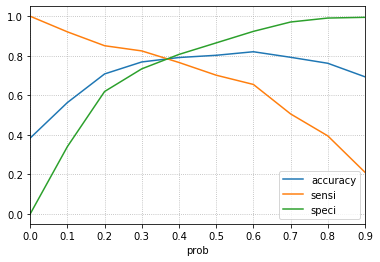

In [28]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.grid(linestyle='dotted')
plt.show()

In [29]:
from sklearn.metrics import accuracy_score
df_train_final['Predicted_0.36'] = [1 if i > 0.36 else 0 for i in df_train_final["Probability"]]
df_train_final['Predicted_0.5'] = [1 if i > 0.5 else 0 for i in df_train_final["Probability"]]

print("Accuracy Score for train data: ", accuracy_score(df_train_final['Original'], df_train_final['Predicted_0.36']))
print("Accuracy Score for train data: ", accuracy_score(df_train_final['Original'], df_train_final['Predicted_0.5']))

Accuracy Score for train data:  0.7901234567901234
Accuracy Score for train data:  0.8024691358024691


In [30]:
X_test = df_test.drop(["PassengerId"], axis=1)
y_test_pred = res.predict(sm.add_constant(X_test[col]))
df_test_pred = pd.DataFrame({"PassengerId": df_test["PassengerId"]})
df_test_pred['Survived'] = [1 if i > 0.36 else 0 for i in y_test_pred]
df_test_pred.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [32]:
df_test_pred.to_csv("..//Titanic//submission_file_LR.csv", sep=",")